## Exercise n°1 : Logistic regression by gradient descent

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import random

# To visualize generated data
def show_datagen(X,y):
    centers = len(np.unique(y))
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title(f"{centers} normally-distributed clusters")
    plt.show()

In [60]:
import numpy as np

def _signed_distance(x):
    x1, x2 = x
    a = -0.5; b = -1; c = 0.75

    distance = (a*x1 + b*x2 + c)/np.sqrt(a**2 + b**2)
    return distance
    
    
def datagen(n, sigma = 0.05):
    np.random.seed(42)
    X = np.random.rand(n,2)
    y = np.zeros((n))
    for i in range(n):
        D = _signed_distance(X[i])
        if D > 0:
            y[i] = 1

        r = np.exp(-( (D**2)/(2*(sigma**2)) ) )
        Z = np.random.binomial(1, r/2)

        if Z == 1:
          y[i] = 1 - y[i]
    
    return X, y

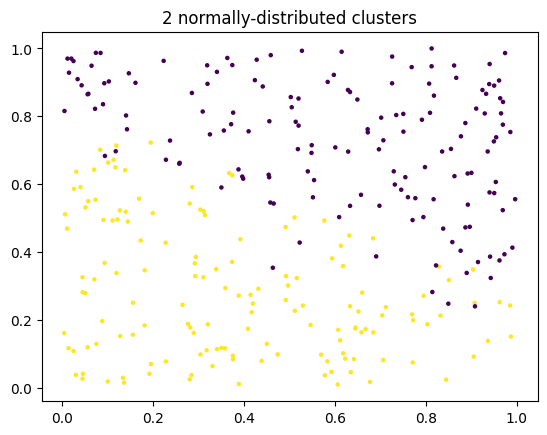

In [61]:
X, y = datagen(300)
show_datagen(X, y)

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
The dataset I generated consists of two classes that slightly overlap, meaning that the dataset is not perfectly linearly separable.
</div>

### Question 2

In [62]:
ones = np.ones((300, 1))
X_plus = np.concatenate((X, ones), axis=1)
print(f"X shape: {X.shape} -> X_plus shape: {X_plus.shape}")
print(f"Quick sample : {X_plus[0:10]}")

X shape: (300, 2) -> X_plus shape: (300, 3)
Quick sample : [[0.37454012 0.95071431 1.        ]
 [0.73199394 0.59865848 1.        ]
 [0.15601864 0.15599452 1.        ]
 [0.05808361 0.86617615 1.        ]
 [0.60111501 0.70807258 1.        ]
 [0.02058449 0.96990985 1.        ]
 [0.83244264 0.21233911 1.        ]
 [0.18182497 0.18340451 1.        ]
 [0.30424224 0.52475643 1.        ]
 [0.43194502 0.29122914 1.        ]]


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

We can see if X is of size (m,d), the new X become (m, d+1).
This allows us to include the intercept (bias) in the weight vector and compute the predictions usings a single matrix-vector multiplication.
I adapted the shape, so my $X_+$ looks like :
$$ X_+ = (
    \begin{bmatrix}
    x^{(1)}\\
    1\\
    \end{bmatrix}^{.T}
    ... 
    \begin{bmatrix}
    x^{(n)}\\
    1\\
    \end{bmatrix}^{.T}
)
$$
</div>

### Question 3

In [63]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, thetha, threshold=0.5):
    '''
    Predict function for logistic regression
    
    :param X: Input data of size n * m
    :param thetha: Initial theta
    :param threshold: Threshold for prediction
    return : prediction of the input data
    '''
    n = X.shape[0]
    y_pred = np.zeros((n,))
    probabilities = sigmoid(thetha @ X.T)
    for i in range(n):
        if probabilities[i] >= threshold:
            y_pred[i] = 1
        else:
            y_pred[i] = 0
    return y_pred

def batch_gradient_descent(X, y, thetha = None, learning_rate=0.01, nb_epochs=1000, threshold=1e-5):
    '''
    Batch gradient descent
    
    :param X: Array of size n * m  
    :param y: Array of size n
    :param thetha: Initial set of weights + intercept
    :param learning_rate: learning rate of the gradient descent
    :param nb_epochs: maximum number of epochs 
    :param threshold: threshold on the norm of the gradient for stopping criterion
    :return: thethas: Array of size (m,cpt+1) containing the history of thethas at each epoch
             cpt: number of epochs done
    '''

    # Initialization of theta at 0 if is None
    if thetha is None:
        d = X.shape[1]
        thetha = np.zeros((d,))
    
    # Initialize history of thethas and add the initialisation of the theta
    thethas = np.zeros((nb_epochs+1, X.shape[1]))
    thethas[0] = thetha
    
    n = X.shape[0]
    y_pred = np.zeros((n))
    
    cpt = 0
    norme_gradient = np.inf
    # Gradient descent loop stop condition: number of epochs or gradient_norm below the treshold.
    while cpt < nb_epochs and norme_gradient > threshold:
        cpt = cpt + 1
        # Compute predictions
        y_pred = sigmoid(X @ thetha)
        errors = y_pred - y
        gradient = X.T @ errors

        norme_gradient = np.linalg.norm(x = gradient/n, ord = 2)
        # Update thethas 
        thetha = thetha - (learning_rate * gradient)
        thethas[cpt] = thetha

    return thethas[:cpt+1], cpt

In [64]:
thethas, nb_epochs = batch_gradient_descent(X_plus, y, learning_rate=0.1, nb_epochs=1000)
print("Learned thetha:", thethas[-1], " in " + str(nb_epochs) + " epochs, then shape of thethas:", thethas.shape)

Learned thetha: [-12.66808865 -23.98867214  18.47386829]  in 912 epochs, then shape of thethas: (913, 3)


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

**Result**  
We observe that our model stop before the epochs limit. This show us that the gradient norm fell below the tolerance threshold ($10^{-5}$), meaning the algorithm found a solution close the minimum enough. The size of the parameter matrix $\theta$ is $(1001, 3)$ because the shape of the data was modified. However, by simply transposing it, we can obtain the equivalent shape $(3, 1001)$.

**Initialization**  
I have initialized the weights of $\theta_0$ to 0 by default. However, since prediction quality depends heavily on weight initialization, you can pass a custom initialization as a parameter.

**Stopping**  
In an optimal scenario, the model converges toward a solution. However, this process can be time-consuming, or the model may get stuck in a local minimum. For these reasons, it is crucial to set a maximum number of epochs and/or an error tolerance threshold.

**Note**  
The computation are adapted to the shape of my input.

## Question 4

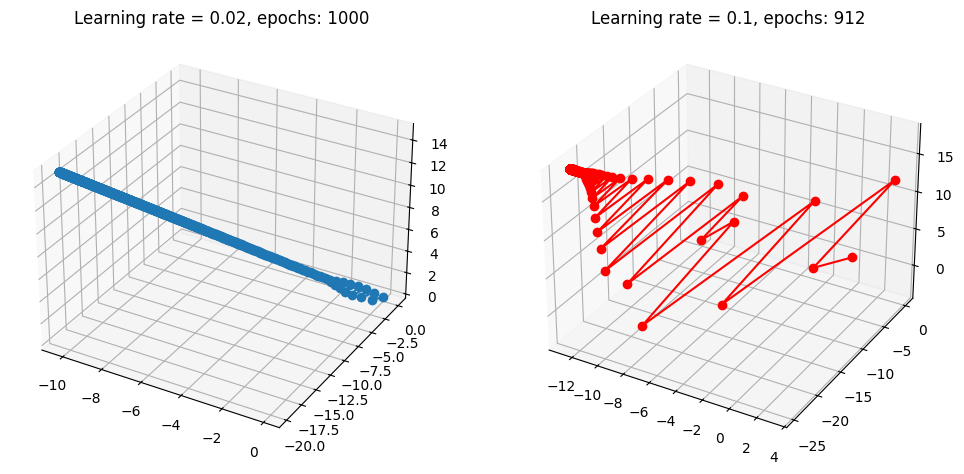

In [65]:
from mpl_toolkits.mplot3d import Axes3D
thetas_slow, nb_epochs_slow = batch_gradient_descent(X_plus, y, learning_rate=0.02, nb_epochs=1000)
thetas_fast, nb_epochs_fast = batch_gradient_descent(X_plus, y, learning_rate=0.1, nb_epochs=1000)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
ax.plot(thetas_slow[:,0], thetas_slow[:,1], thetas_slow[:,2], '-o')
ax.set_title("Learning rate = 0.02, epochs: " + str(nb_epochs_slow))

bx = fig.add_subplot(122, projection='3d')
bx.plot(thetas_fast[:,0], thetas_fast[:,1], thetas_fast[:,2], '-o', color='red')
bx.set_title("Learning rate = 0.1, epochs: " + str(nb_epochs_fast))

plt.show()

### Comparaison of the 2 learning rate

In [66]:
from sklearn.metrics import zero_one_loss

thetas_slow, nb_epochs_slow = batch_gradient_descent(X_plus, y, learning_rate=0.02, nb_epochs=3000)
thetas_fast, nb_epochs_fast = batch_gradient_descent(X_plus, y, learning_rate=0.1, nb_epochs=3000)

# Evaluate final models
y_pred_slow = predict(X_plus, thetas_slow[-1])
y_pred_fast = predict(X_plus, thetas_fast[-1])

print("Theta (slow):", thetas_slow[-1], "nb epochs:", nb_epochs_slow)
print("Theta (fast):", thetas_fast[-1], "nb epochs:", nb_epochs_fast)
print("Final zero-one loss (slow):", zero_one_loss(y, y_pred_slow))
print("Final zero-one loss (fast):", zero_one_loss(y, y_pred_fast))

Theta (slow): [-12.2258316  -23.17979641  17.83714881] nb epochs: 3000
Theta (fast): [-12.66808865 -23.98867214  18.47386829] nb epochs: 912
Final zero-one loss (slow): 0.06000000000000005
Final zero-one loss (fast): 0.06000000000000005


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

In our case, both solutions converge to different weights but provide similar prediction quality. 

Despite similar initialization and starting conditions, learning rate have a significant impact on the convergence behavior of the weights. In particular, a higher learning rate allows the model to converge quicker. With $\eta = 0.02$ the algorithm reaches the limit of numbers of epochs, whereas with $\eta = 0.1$, the algorithm stop earlier due to the stopping criterion.

From the plots, we observe that higher learning rates lead to stronger oscillations in the values of $\theta$, whereas a smaller learning rate results in lighter parameter updates, leading to a significantly slower convergence.

## Comparaison of more learning rate

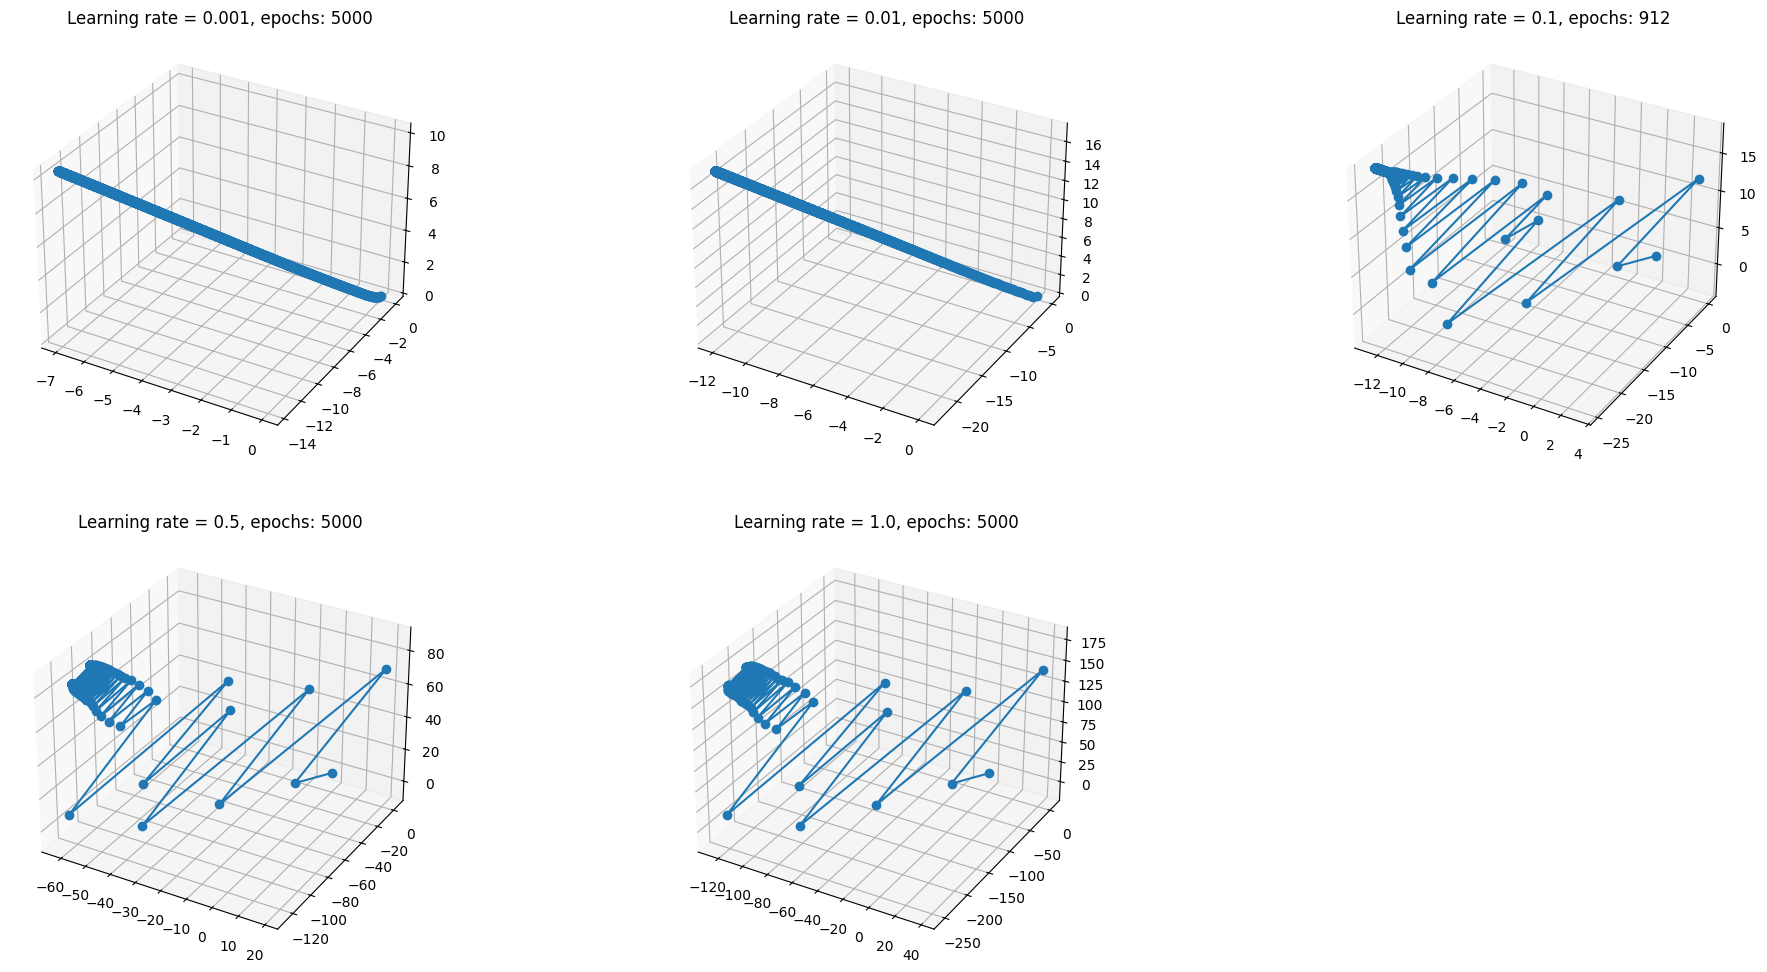

In [67]:
fig = plt.figure(figsize=(24,12))
etas = [0.001, 0.01, 0.1, 0.5, 1.0]
for i, eta in enumerate([0.001, 0.01, 0.1, 0.5, 1.0]):
    thethas, nb_epochs = batch_gradient_descent(X_plus, y, learning_rate=eta, nb_epochs=5000)
    ax = fig.add_subplot(2, 3, i + 1, projection='3d')
    ax.plot(thethas[:,0], thethas[:,1], thethas[:,2], '-o')
    ax.set_title("Learning rate = " + str(eta) + ", epochs: " + str(nb_epochs))

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">
As we can see too big learning rate make the theta oscilate around the minimum, never reaching it.

## Question 5 : SGD

In [68]:
from numpy.random import permutation

def stochastic_gradient_descent(X, y, thetha = None, learning_rate=0.01, nb_epochs=1000, threshold=1e-5):
    '''
    Stochastic gradient descent 
    
    :param X: Array of size n * m  
    :param y: Array of size n
    :param thetha: Initial set of weights + intercept
    :param learning_rate: learning rate of the gradient descent
    :param nb_epochs: maximum number of epochs 
    :param threshold: threshold on the norm of the gradient for stopping criterion
    :return: theta: final set of weights
             thethas: Array of size (m,cpt+1) containing the history of thethas at each epoch
             cpt: number of epochs done
    '''

    # Initialize history of thethas
    thethas = np.zeros(((X.shape[0]*nb_epochs)+1, X.shape[1]))
    # Initialization of theta if is None
    if thetha is None:
        d = X.shape[1]
        thetha = np.zeros((d,))
    n = X.shape[0]

    cpt = 0
    norme_gradient = np.inf
    # 
    while cpt < nb_epochs and norme_gradient > threshold:
        sigma = permutation(n)
        X_shuffled = X[sigma]
        y_shuffled = y[sigma]

        global_grad = np.zeros_like(thetha)
        # Compute predictions and gradient to update the theta
        for j in range(n):
            y_pred = sigmoid(np.dot(X_shuffled[j], thetha))
            error = y_pred - y_shuffled[j]
            gradient = X_shuffled[j] * error

            # Update thetha
            thetha = thetha - (learning_rate) * gradient
            thethas[1 + cpt*n + j] = thetha

            # Adding this gradient to the global gradient 
            global_grad += gradient
            
        gradient_average = global_grad/n
        norme_gradient = np.linalg.norm(x=gradient_average, ord=2)
        cpt = cpt + 1
        

    return thetha, thethas[:((cpt*n)+1)], cpt

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

I decided to store all updates of $\theta$. The size of the history of $\theta$ is given by :
$$ size = (\text{number of parameter of } \theta) * ( epochs * n + 1)$$
with epochs the actual number of epochs and n the number of row in X.

## Question 6 : Visualization

In [69]:
from numpy.random import seed as set_random_seed
set_random_seed(41)
M = X_plus.shape[0]
thetha, hist_thetas_stochastic, nb_epochs = stochastic_gradient_descent(X_plus, y, learning_rate=1.5, nb_epochs=2000, threshold=1e-5)

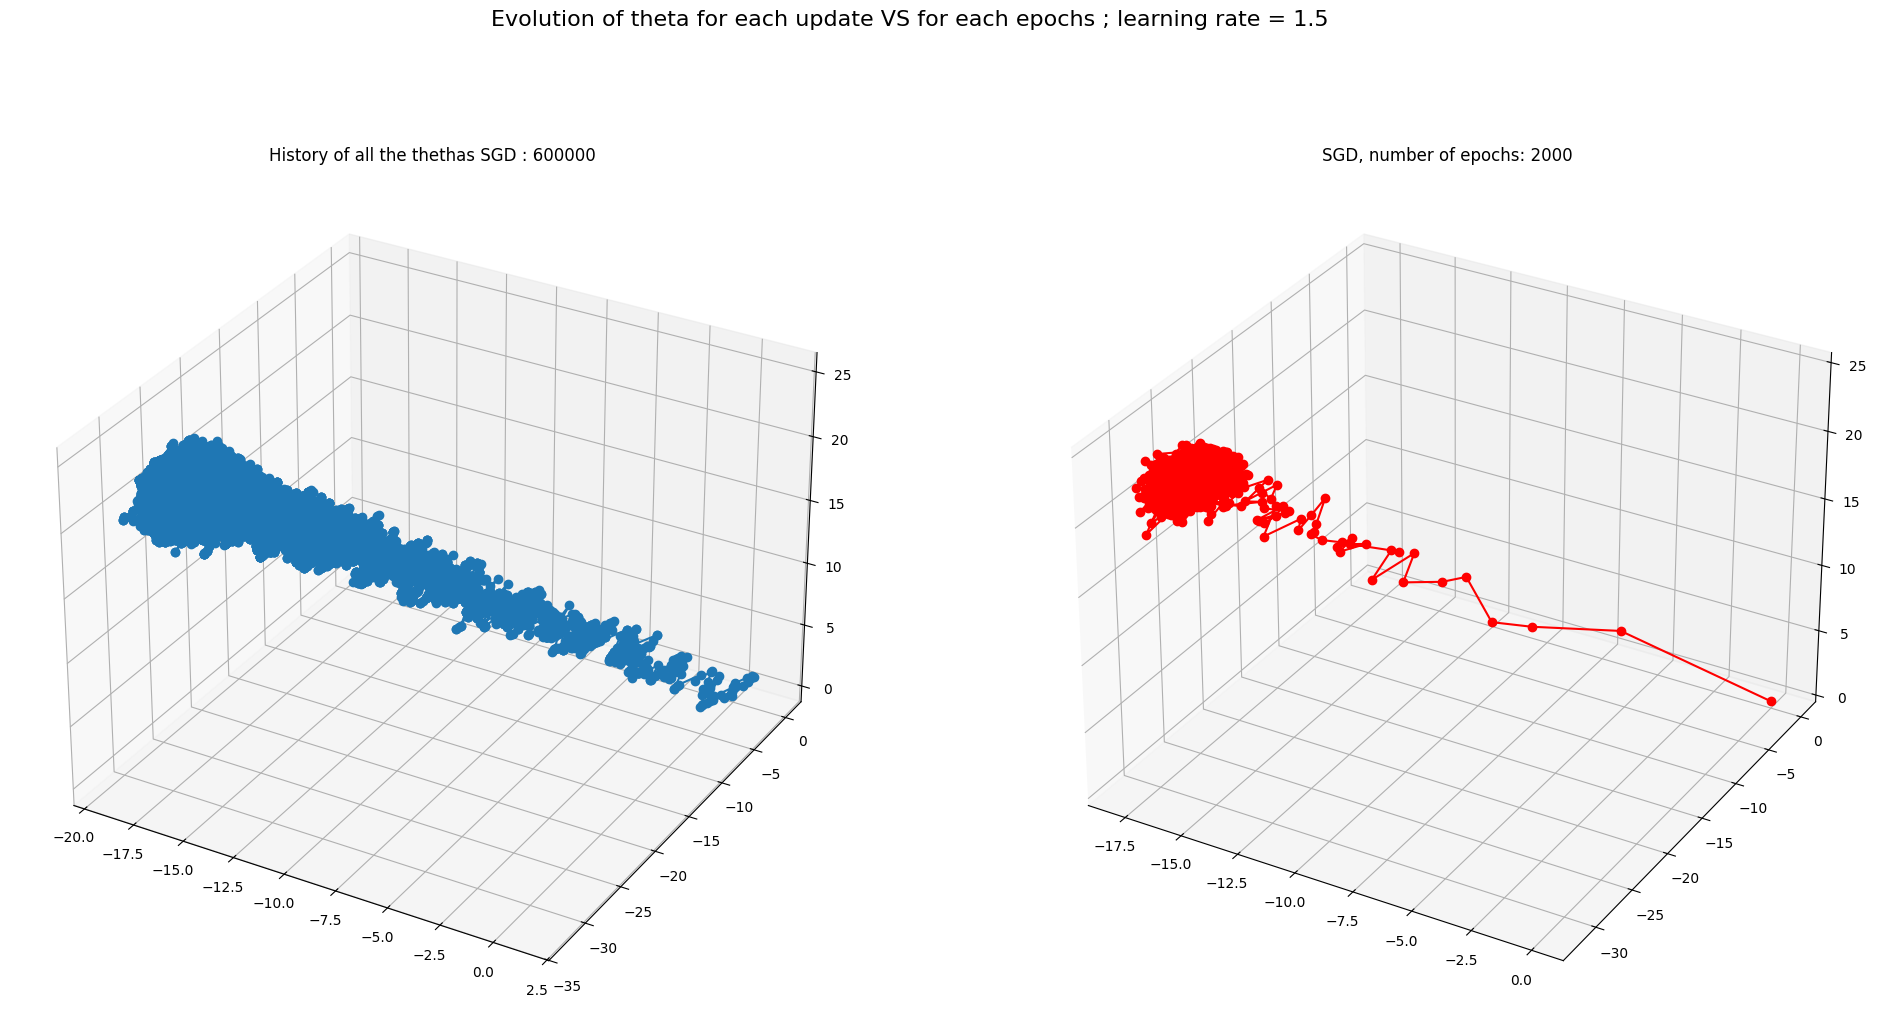

In [70]:
fig = plt.figure(figsize=(24,12))
fig.suptitle("Evolution of theta for each update VS for each epochs ; learning rate = 1.5", fontsize=16)
ax = fig.add_subplot(121, projection='3d')
ax.plot(hist_thetas_stochastic[: ,0], hist_thetas_stochastic[: ,1], hist_thetas_stochastic[: ,2], '-o')
ax.set_title("History of all the thethas SGD : " + str(nb_epochs*M))

subset = hist_thetas_stochastic[::M, :]  
bx = fig.add_subplot(122, projection='3d')
bx.plot(subset[: ,0], subset[: ,1], subset[: ,2], '-o', color='red')
bx.set_title("SGD, number of epochs: " + str(nb_epochs))
plt.show()


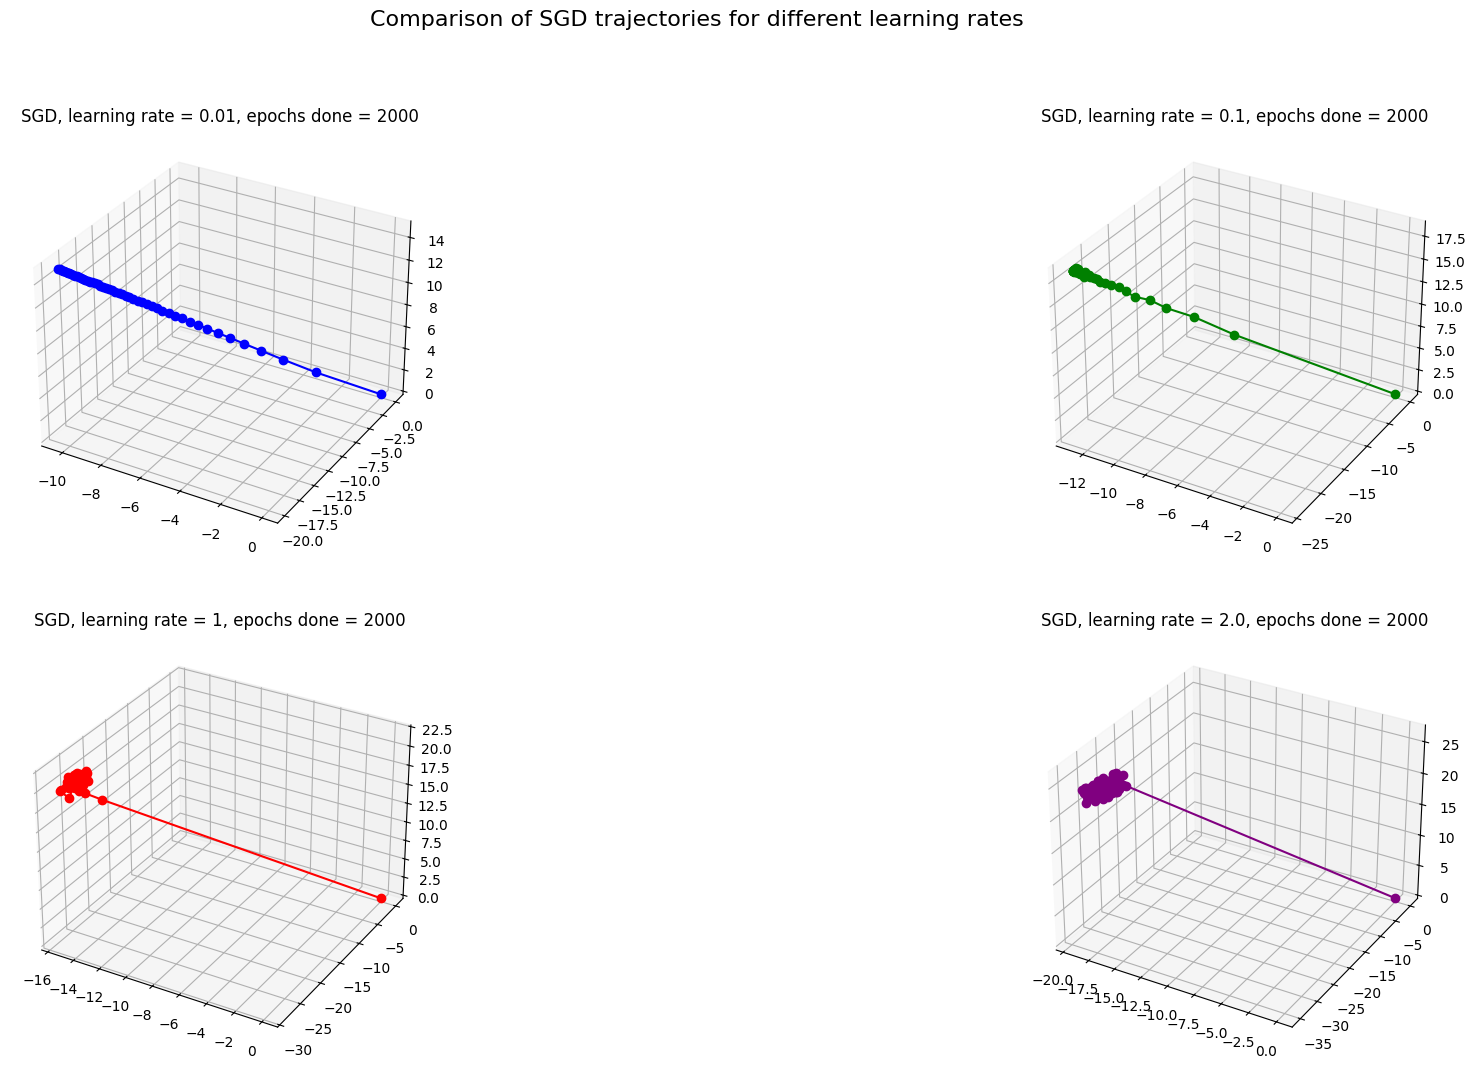

In [71]:
fig = plt.figure(figsize=(24,12))
fig.suptitle("Comparison of SGD trajectories for different learning rates", fontsize=16)

learning_rates = [0.01, 0.1, 1, 2.0]
colors = ['blue', 'green', 'red', 'purple']

for i, lr in enumerate(learning_rates):
    theta, hist_thetas, nb_epochs_done = stochastic_gradient_descent(X_plus, y, learning_rate=lr, nb_epochs=2000, threshold=1e-5)
    subset = hist_thetas[::len(hist_thetas)//50, :] 
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    ax.plot(subset[:, 0], subset[:, 1], subset[:, 2], '-o', color=colors[i])
    ax.set_title(f"SGD, learning rate = {lr}, epochs done = {nb_epochs_done}")

plt.show()


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

Stochastic gradient descent allows us to compute the gradient for each point one by one within each epoch, significantly reducing the computational cost compared to classic batch gradient descent, which processes all n values at once, this allow us to tend close to the minimum way faster in term of epochs and computation time.  

But because each update is based on a single point, the gradient is noisy, so the SGD to oscillate around the minimum.  

With a high learning rate, the noise of each point have an important impact on the parameter updates.

# Exercice 7

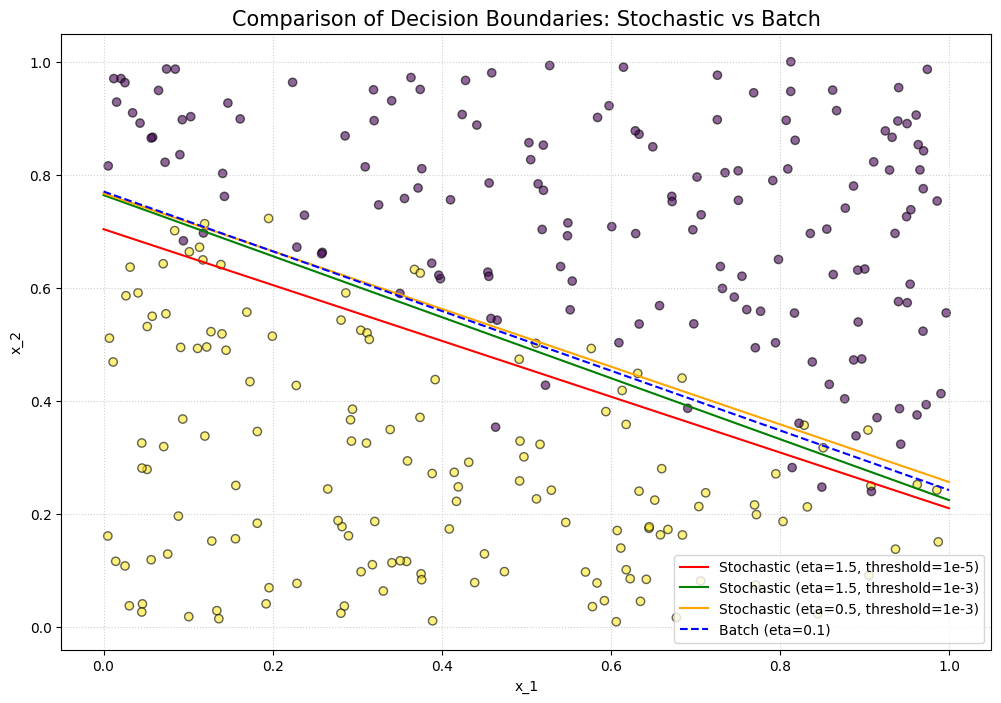

In [89]:
theta_strict, theta_strict_history, strict_nb_stochastic_epochs = stochastic_gradient_descent(X_plus, y, learning_rate=1.5, nb_epochs=2000, threshold=1e-5)
theta_soft, theta_soft_history, soft_nb_stochastic_epochs = stochastic_gradient_descent(X_plus, y, learning_rate=1.5, nb_epochs=2000, threshold=1e-3)
theta_soft_lr05, theta_soft_lr05_history, soft_lr05_epochs = stochastic_gradient_descent(X_plus, y, learning_rate=0.5, nb_epochs=2000, threshold=1e-3)

thetas_batch_strict, strict_batch_epochs = batch_gradient_descent(X_plus, y, learning_rate=0.1, nb_epochs=2000, threshold=1e-5)
thetas_batch_soft, soft_batch_epochs = batch_gradient_descent(X_plus, y, learning_rate=0.1, nb_epochs=2000, threshold=1e-3)

x1 = np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(12, 8))

x2_stochastic_strict = -(theta_strict[0]*x1 + theta_strict[2]) / theta_strict[1]
ax.plot(x1, x2_stochastic_strict, color='red', label=f'Stochastic (eta=1.5, threshold=1e-5)')

x2_stochastic_soft = -(theta_soft[0]*x1 + theta_soft[2]) / theta_soft[1]
ax.plot(x1, x2_stochastic_soft, color='green', label=f'Stochastic (eta=1.5, threshold=1e-3)')

x2_stochastic_soft_lr05 = -(theta_soft_lr05[0]*x1 + theta_soft_lr05[2]) / theta_soft_lr05[1]
ax.plot(x1, x2_stochastic_soft_lr05, color='orange', label=f'Stochastic (eta=0.5, threshold=1e-3)')

theta_batch_strict = thetas_batch_strict[-1]
x2_batch = -(theta_batch_strict[0]*x1 + theta_batch_strict[2]) / theta_batch_strict[1]
ax.plot(x1, x2_batch, color='blue', linestyle='--', label=f'Batch (eta=0.1)')

ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolors='k')

ax.set_title("Comparison of Decision Boundaries: Stochastic vs Batch", fontsize=15)
ax.set_xlabel("x_1")
ax.set_ylabel("x_2")
ax.legend()

plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


## Comparaison of the stochastic and batch descent gradient

In [90]:
# Evaluate final models
y_pred_stochastic_strict = predict(X_plus, theta_strict)
y_pred_stochastic_soft = predict(X_plus, theta_soft)
y_pred_stochastic_soft_lr05 = predict(X_plus, theta_soft_lr05)
y_pred_batch_strict = predict(X_plus, theta_batch_strict)
y_pred_batch_soft = predict(X_plus, thetas_batch_soft[-1])

print("Stochastic Theta (strict), learning rate = 1.5:", theta_strict, "nb epochs:", strict_nb_stochastic_epochs)
print("Stochastic Theta (soft), learning rate = 1.5:", theta_soft, "nb epochs:", soft_nb_stochastic_epochs)
print("Stochastic Theta (soft), learning rate = 0.5:", theta_soft_lr05, "nb epochs:", soft_lr05_epochs)
print("Batch Theta (strict), learning rate = 0.1:", theta_batch_strict, "nb_epochs:", strict_batch_epochs)
print("Batch Theta (soft), learning rate = 0.1:", thetas_batch_soft[-1], "nb_epochs:", soft_batch_epochs)


Stochastic Theta (strict), learning rate = 1.5: [-15.14423414 -30.67713807  21.58199748] nb epochs: 2000
Stochastic Theta (soft), learning rate = 1.5: [-14.58892332 -27.03778182  20.65203556] nb epochs: 35
Stochastic Theta (soft), learning rate = 0.5: [-10.9601339  -21.47281632  16.46405687] nb epochs: 50
Batch Theta (strict), learning rate = 0.1: [-12.66808865 -23.98867214  18.47386829] nb_epochs: 912
Batch Theta (soft), learning rate = 0.1: [-12.0366078  -22.83952862  17.58473821] nb_epochs: 78


<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

So we have seen that the SGD tends more quickly towards the solution than the batch gradient descent. However, for a very low tolerance threshold, the noise of individual values makes $\theta$ oscillate around the minimum.

Finally, we can see that for a very low tolerance threshold, the stochastic gradient descent will not stop prematurely compared to the batch gradient descent. However, we notice that for a higher threshold $(1e−3)$, the stochastic gradient descent becomes more interesting, converging more quickly towards a minimum satisfying the constraint, though as we can see from the plot, for a SGD with high learning rate it may result in a $\theta$ that is slightly less precise
</div>

## Question 8 : Modifying the SGD

In [91]:
from numpy.random import permutation

def stochastic_gradient_descent_sized_batch(
        X, 
        y, 
        theta = None, 
        learning_rate=0.01, 
        nb_epochs=1000, 
        threshold = 1e-5,
        batch_size = 1
        ):
    '''
    Stochastic gradient descent with choosed batch size
    
    :param X: Array of size n * m  
    :param y: Array of size n
    :param thetha: Initial set of weights + intercept
    :param learning_rate: learning rate of the gradient descent
    :param nb_epochs: maximum number of epochs 
    :param threshold: threshold on the norm of the gradient for stopping criterion
    :param batch_size: size of each batch for the training
    :return: theta: final set of weights
             thethas: Array of size (m,cpt+1) containing the history of thethas at each epoch
             cpt: number of epochs done
    '''
    thethas = np.zeros((nb_epochs+1, X.shape[1]))

    # Initialization of theta if is None
    if theta is None:
        d = X.shape[1]
        theta = np.zeros((d,))
    n = X.shape[0]

    cpt = 0
    norme_gradient = np.inf
    # Convergence loop
    while cpt < nb_epochs and norme_gradient > threshold:
        sigma = permutation(n)
        X_shuffled = X[sigma]
        y_shuffled = y[sigma]

        # Use to compute the sum of each gradient
        grad_totale = np.zeros_like(theta)

        # Compute predictions
        for j in range(0, n, batch_size):
            y_pred = sigmoid(np.dot(X_shuffled[j:j+batch_size], theta))
            error = y_pred - y_shuffled[j:j+batch_size]
            gradient = np.dot(X_shuffled[j:j+batch_size].T, error.T)

            # Update thethas 
            theta = theta - (learning_rate) * gradient
            
            # Modifying the gradient
            grad_totale += gradient

        thethas[cpt+1] = theta
        cpt = cpt + 1
        
        # Computing the norm of the average value of the gradient
        average_grad = grad_totale/(n/batch_size)
        norme_gradient = np.linalg.norm(x = average_grad, ord=2)
        
    return theta, thethas[:cpt+1], cpt

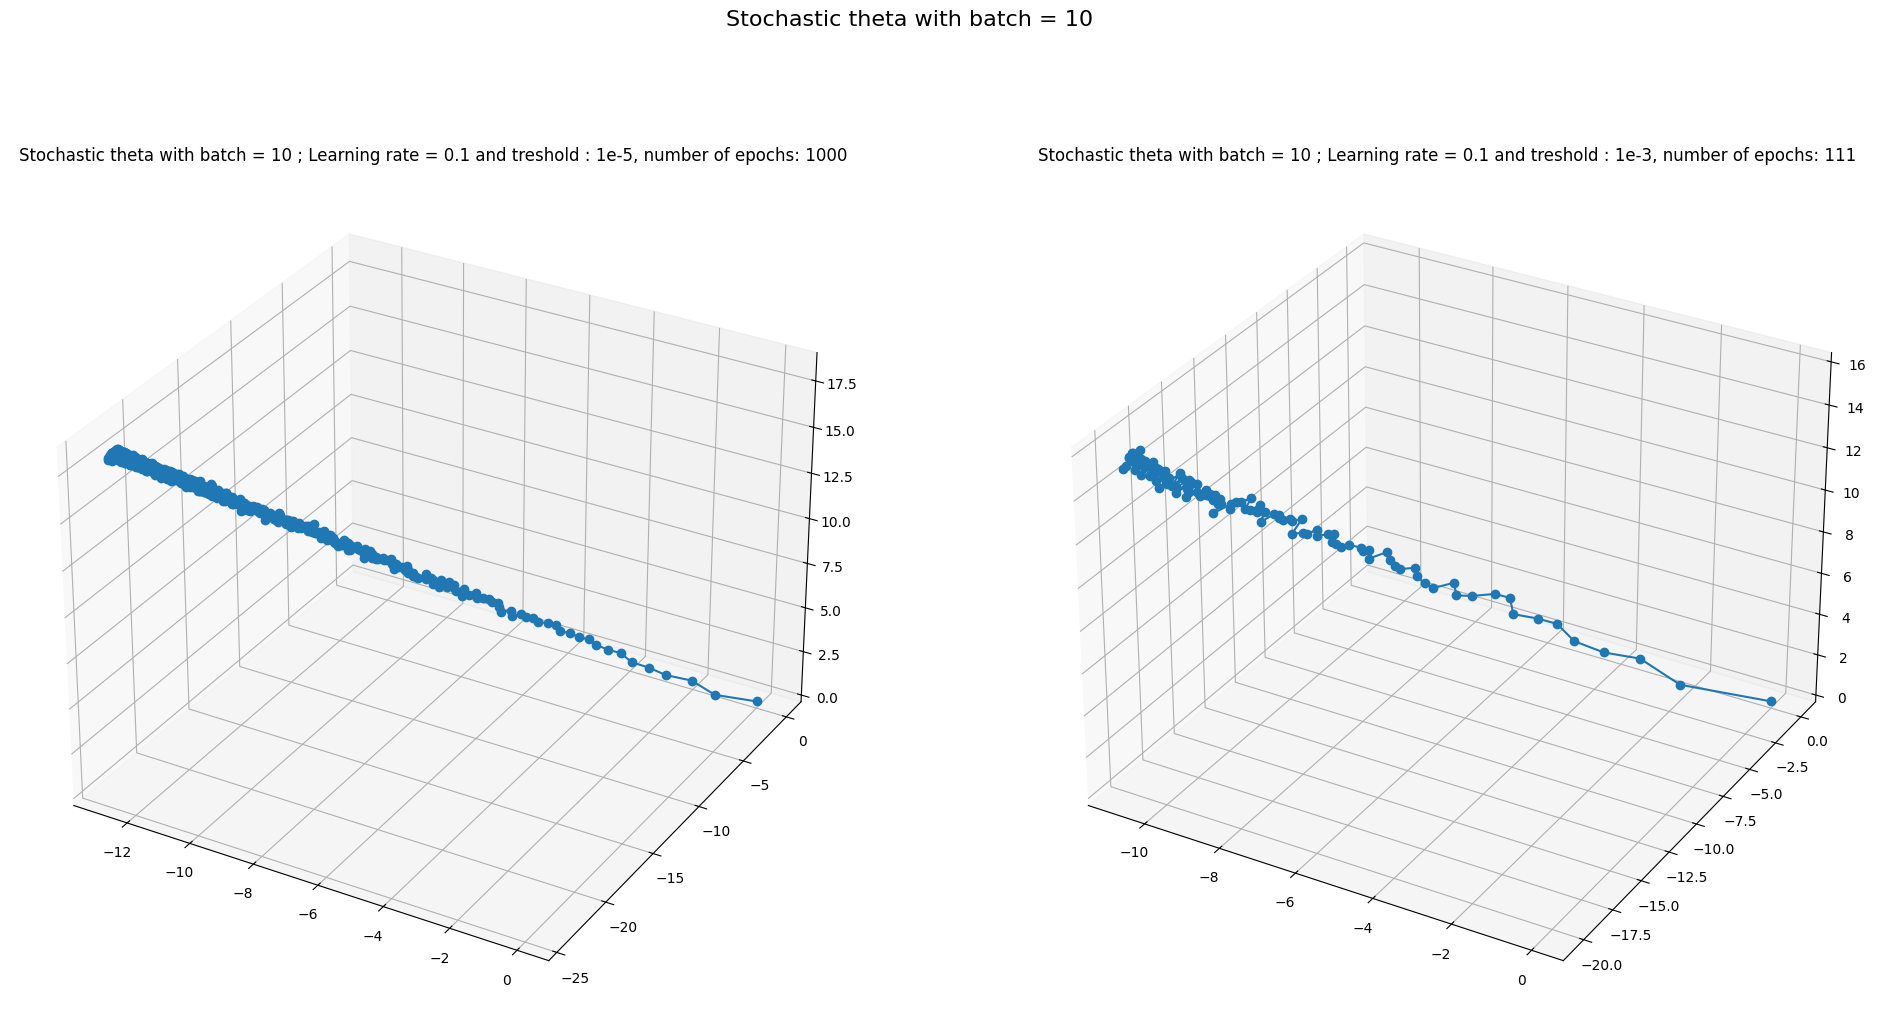

In [92]:
fig = plt.figure(figsize=(24,12))
fig.suptitle("Stochastic theta with batch = 10", fontsize=16)

theta, hist_thetas_stochastic, epochs = stochastic_gradient_descent_sized_batch(X_plus, y, learning_rate=0.1, nb_epochs=1000, batch_size=10)
ax = fig.add_subplot(121, projection='3d')
ax.plot(hist_thetas_stochastic[: ,0], hist_thetas_stochastic[: ,1], hist_thetas_stochastic[: ,2], '-o')
ax.set_title("Stochastic theta with batch = 10 ; Learning rate = 0.1 and treshold : 1e-5, number of epochs: " + str(epochs))

theta, hist_thetas_stochastic, epochs = stochastic_gradient_descent_sized_batch(X_plus, y, learning_rate=0.2, nb_epochs=1000, batch_size=10, threshold=1e-2)
bx = fig.add_subplot(122, projection='3d')
bx.plot(hist_thetas_stochastic[: ,0], hist_thetas_stochastic[: ,1], hist_thetas_stochastic[: ,2], '-o')
bx.set_title("Stochastic theta with batch = 10 ; Learning rate = 0.1 and treshold : 1e-3, number of epochs: " + str(epochs))

plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0;">

SGD with a batch size of 10 updates the parameters using 10 points at a time, reducing the variance of the updates and making learning more stable. A larger batch size slows down each update but makes learning less sensitive to the noise of individual points.